In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")                       #importing libraries

In [4]:
df=pd.read_csv("IRIS.csv")      #fetching data

In [5]:
df.head()    #visualizing data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape     #checking the rows and columns of dataset

(150, 5)

In [16]:
df.isna().sum()       #checking if there is any null value present

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
df.duplicated().sum()  #checking if there is any duplicated value

3

In [18]:
df.drop_duplicates(inplace=True)    #dropping the duplicated value

In [34]:
df.reset_index(inplace=True)     #reset the index value

In [36]:
df.info()         #checking whether the index values has been reset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         147 non-null    int64  
 1   sepal_length  147 non-null    float64
 2   sepal_width   147 non-null    float64
 3   petal_length  147 non-null    float64
 4   petal_width   147 non-null    float64
 5   species       147 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.0 KB


In [15]:
df['species'].value_counts()      #checking the counts of class of target column

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
df["species"] = df["species"].map({"Iris-versicolor":0,"Iris-virginica":1,"Iris-setosa":2})    #encoding the class of target column

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


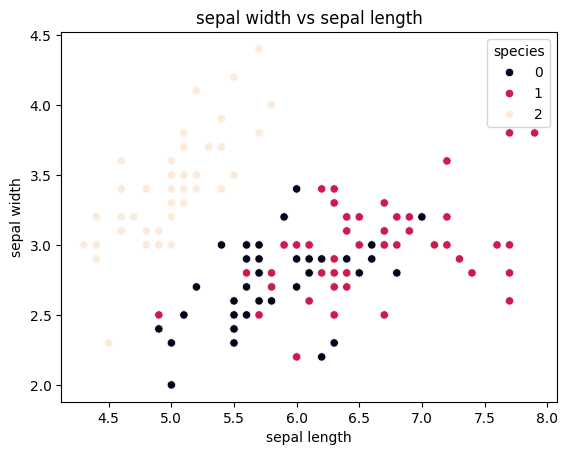

In [22]:
sns.scatterplot(df,x=df['sepal_length'],y=df['sepal_width'], hue='species',palette='rocket')
plt.title("sepal width vs sepal length")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()                                          #visualizing the sepal length and sepal width relation

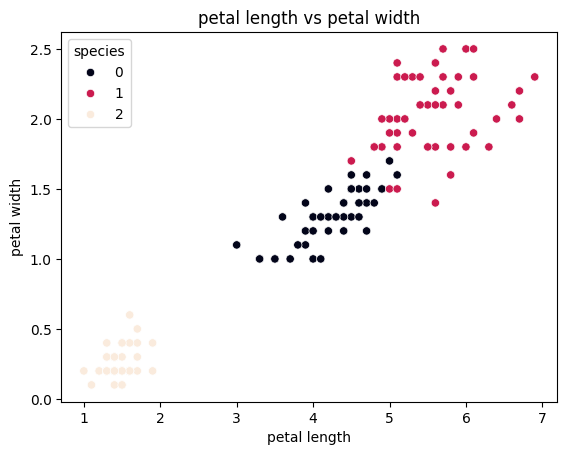

In [23]:
sns.scatterplot(df,x='petal_length',y='petal_width',hue='species',palette='rocket')
plt.title("petal length vs petal width")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()                                             #visualizing the petal length and petal width relation

In [24]:
X=df.drop("species",axis=1)            #assigning X and y for train test split

In [25]:
y=df["species"]

In [26]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,train_size=0.75,random_state=0)

In [27]:
model=LogisticRegression()                    #model assignment

In [28]:
model.fit(X_tr,y_tr)                        #model fitting

LogisticRegression()

In [29]:
model.score(X_tr,y_tr)                    #model score is good enough

0.9545454545454546

In [30]:
y_pred=model.predict(X_te)

In [31]:
accuracy_score(y_te,y_pred)             #accuracy score is good enough

1.0

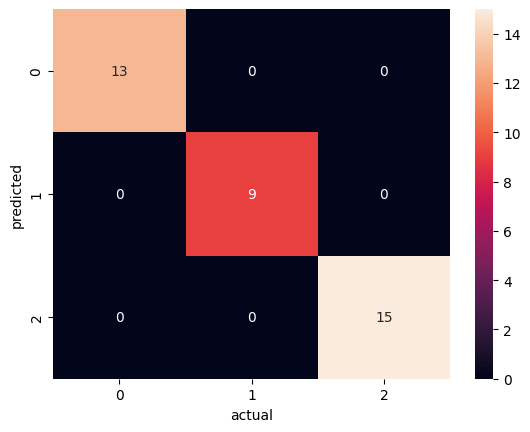

In [33]:
sns.heatmap(confusion_matrix(y_te,y_pred),annot=True)
plt.xlabel("actual")                                       #visualizing the confusion matrix 
plt.ylabel("predicted")
plt.show()